# C3M3 Lesson 2 Practice Lab: Flight delays and cancellations - Plotting with Seaborn

After analyzing the monthly Australian flight delays and cancellations in your previous task, it’s time to expand your insights with more sophisticated visualizations.

You will be working with a filtered version of the Domestic Airlines - On Time Performancen dataset from the Australian Government. This filtered version has only data for the 5 most popular routes. You will use the following columns in this lab:

- `Route`: Plane route Departure City - Arrival City
- `Airline`: name of the operating airline. If the value is "All Airlines", the data given represents aggregated values.
- `Sectors_Scheduled`: how many flights were scheduled for the given airline and route for the given month
- `Cancellations`: number of cancellations
- `Month_Num`: month of the given data. 1:Jan, …, 12:Dec

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 

</div>

## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Understanding the distribution of cancellations](#understanding-the-distribution-of-cancellations)
    - [Histograms](#histograms)
    - [Box-plots](#box-plots)
    - [Cancellation rates by airline](#cancellation-rates-by-airline)
- [Step 4: Cancellations by month](#cancellations-by-month)

<a id="import-libraries"></a>

## Step 1: Import libraries
This time you will need to import matplotlib in addition to pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="load-the-data"></a>

## Step 2: Load the data
Run the cell below to load the data.

In [2]:
df = pd.read_csv("otp_top5_routes.csv")
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Brisbane-Melbourne,Brisbane,Melbourne,Qantas,2004-01-01,496.0,492,4.0,410.0,427.0,82.0,65.0,2004,1
1,Brisbane-Sydney,Brisbane,Sydney,Qantas,2004-01-01,683.0,677,6.0,576.0,595.0,101.0,82.0,2004,1
2,Melbourne-Sydney,Melbourne,Sydney,Qantas,2004-01-01,821.0,799,22.0,723.0,706.0,76.0,93.0,2004,1
3,Sydney-Brisbane,Sydney,Brisbane,Qantas,2004-01-01,686.0,682,4.0,614.0,599.0,68.0,83.0,2004,1
4,Sydney-Melbourne,Sydney,Melbourne,Qantas,2004-01-01,800.0,785,15.0,683.0,708.0,102.0,77.0,2004,1


<a id="understanding-the-distribution-of-cancellations"></a>

## Step 3: Understanding the distribution of cancellations
So far you were able to identify which routes suffered more cancellations, and which airlines where responsible for those cancellations. Descriptive statistics are super useful for that, however now you want to know the distribution of variable. That way you can know if months with high cancellation rates are outliers, or if they are really a permanent issue for some airlines.

<a id="histograms"></a>

### Histograms
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>In the next cell, create a column called "Cancellation_Rates" that contains the ratio of canceled flights to the total number of scheduled flights</li>
            <li>Plot the distribution of the cancellation rates.</li>
            <ul>
                <li> Use "otp" as data and "Cancellation_Rates" as x</li>
                <li> Change the x-axis label to "Cancellation Rates"</li>
                <li> Add the title "Cancellation rates distribution"</li>
            </ul>
        </ol>
</div>


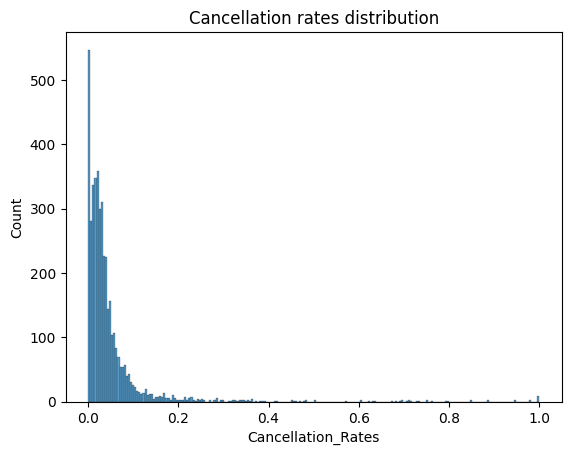

In [3]:
### START CODE HERE ###

# find the proportion of cancelled flights (divide cancellations by the scheduled flights)
df["Cancellation_Rates"] = df['Cancellations'] / df['Sectors_Scheduled']

# plot the histogram
sns.histplot(data=df, x="Cancellation_Rates")
# change xlabel
plt.xlabel("Cancellation_Rates")
# add the title
plt.title("Cancellation rates distribution")

plt.show()

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL2/hist.png" width="350">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# find the proportion of cancelled flights (divide cancellations by the scheduled flights)
df["Cancellation_Rates"] = df["Cancellations"] / df["Sectors_Scheduled"]

# plot the histogram
sns.histplot(data=df, x="Cancellation_Rates")
# change xlabel
plt.xlabel("Cancellation Rates")
# add the title
plt.title("Cancellation rates distribution")

plt.show()
```
</details>

That is a great visualization. It is telling you that most cancellation rates are small(\<0.1), but that the distribution does have a long tail. What can you say about skewness of this data?

<a id="box-plots"></a>

### Boxplots
While the histogram shows the distribution of cancellation rates, giving you an overall sense of their frequency and spread, you decide to complement this with a boxplot. Boxplots allow you to compare the central tendency (median), spread (quartiles), and identify any outliers across categories like airlines or routes, providing a more concise view of the data’s variability. Find more about Seaborn boxplots in the [official documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to create a boxplot for the cancellation rate</li>
            <ul>
                <li> Change the x-axis label to "Cancellation Rates"</li>
                <li> Add the title "Cancellation rates box-plot"</li>
            </ul>
        </ol>
</div>

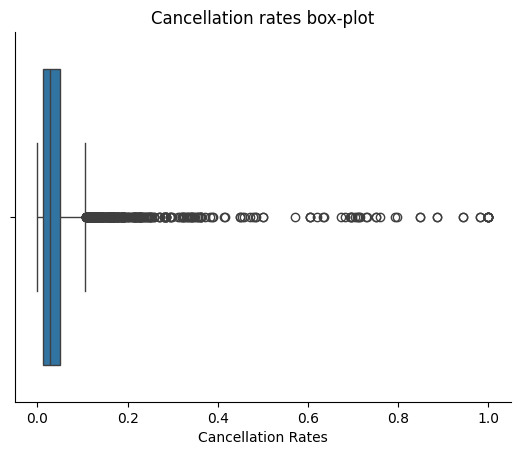

In [4]:
### START CODE HERE ###

#create the boxplot
sns.boxplot(data=df, x="Cancellation_Rates")
# change xlabel
plt.xlabel("Cancellation Rates")
# add the title
plt.title("Cancellation rates box-plot")
# Remove the spines
sns.despine()

plt.show()

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

Your plot should look something like this.

<img src="imgsL2/boxplot.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
#create the boxplot
sns.boxplot(data=df, x="Cancellation_Rates")
# change xlabel
plt.xlabel("Cancellation Rates")
# add the title
plt.title("Cancellation rates box-plot")
# Remove the spines
sns.despine()

plt.show()
```
</details>

You can see the long tail of outliers for this distribution. 


<a id="cancellation-rates-by-airline"></a>

### Cancellation rates by airline

What if you want to see how the airlines differ? Boxplots are great for highlighting differences in their central tendencies, spread and potential outliers.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to create a boxplot for the cancellation rate. You can use the <code>hue</code> named argument.</li>
            <ul>
                <li>Change the x-axis label to "Cancellation Rates".</li>
                <li>Add the title "Cancellation rates by airline".</li>
                <li>Change the position of the legend to outside the plot, so it doesn't block any outliers.</li>
            </ul>
        </ol>
    <strong>Note:</strong> You may see a warning about the hue (the same one as you have seen in the lectures) when running the next cell. You dont need to worry about it.
</div>

In [ ]:
### START CODE HERE ###

#create the boxplot. Use hue to separate by airline
sns.boxplot(data=df, x="Cancellation Rates", hue='Airline')
# change xlabel
plt.xlabel("Cancellation rates by airline")
# add the title
plt.title('"Cancellation rates by airline"')
# change the legend position
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
# Remove the spines
sns.despine()


plt.show()

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL2/boxplot_airline.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
#create the boxplot. Use hue to separate by airline
sns.boxplot(data=df, x="Cancellation_Rates", hue="Airline")
# change xlabel
plt.xlabel("Cancellation Rates")
# add the title
plt.title("Cancellation rates by airline")
# change the legend position
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
# Remove the spines
sns.despine()

plt.show()
```
</details>

There are some really interesting insights you can get from here! For example, which is the airline with the biggest median cancellation rate? Which are the ones with the largest outliers? Which airline seems more secure?

<a id="cancellations-by-month"></a>

## Step 4: Cancellations by month

Flight cancellations don't just depend on the airline—they can also vary across times of the year. To spot these patterns, create a heatmap showing cancellation rates by route and month. This will help you identify which routes and seasons are more prone to disruptions, so you can make better booking recommendations. Find more about the Seaborn heatmap [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>The code for the heatmap has been already filled in for you. Feel free to play around with it. You still have the solution written down below, in case you want to restore the original.</li>
        </ol>
</div>


In [ ]:
### START CODE HERE ###

heatmap_data = df.pivot_table(
    index="Route", 
    columns="Month_Num", 
    values="Cancellation_Rates", 
    aggfunc="mean"
)

# create a new figure with the desired size
plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="Reds", 
    cbar_kws={"label": "Cancellation Rate"},
    vmin=0,
    square=True)
plt.title("Cancellation Rates by Route and Month", fontsize=16)
plt.xlabel("Month")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL2/heatmap.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
heatmap_data = otp.pivot_table(
    index="Route", 
    columns="Month_Num", 
    values="Cancellation_Rates", 
    aggfunc="mean"
)

# create a new figure with the desired size
plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="Reds", 
    cbar_kws={"label": "Cancellation Rate"},
    vmin=0,
    square=True)
plt.title("Cancellation Rates by Route and Month", fontsize=16)
plt.xlabel("Month")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()
```
</details>

Which are the month-route pairs with the largest average cancellation rates? Which season is riskier overall? Remember that Australia is in the Southern hemisphere, so summer is during Dec21-March21, and winter happens from Jun21-Sept21. 

Congratulations for making it until the end of this lab. You will keep working on this dataset in Lesson 3. Hope you enjoyed it! 